# Assignment 3

Darren Singh - 216236275

In [139]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
import seaborn as sns

# Question 1

Data cleaning and choosing a model

In [140]:
# read in data

# UPDATE PATH AS NEEDED
data = pd.read_csv("C:\\Users\\d\\Downloads\\kc_house_data.csv")

# display all columns
pd.set_option('display.max_columns', None)

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [141]:
# check all the columns

data.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [142]:
# notice that there is an entry with 33 bedrooms, there is also a house that cost 7.7mil so this is plausible
# might need to drop this entry when doing linear regression since it is large

# not quite sure how there is a house with 3.5 floors

# A 0.5 decimal of bathrooms is allowed, 2.5 bathrooms means 2 full and 1 half bathroom
# https://realestatechuck.com/bathrooms-defined/#:~:text=Two%20and%20a%20half%20baths&text=So%2C%20to%20break%20it%20down,quarter%20bathroom%2C%20and%20a%20half

# to get these insights im looking at the max values from the output of the describe above
# most of the columns max values are plausible for an expensive house

data[data['floors'] % 1 != 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
14,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
17,6865200140,20140529T000000,485000.0,4,1.00,1600,4300,1.5,0,0,4,7,1600,0,1916,0,98103,47.6648,-122.343,1610,4300
25,1202000200,20141103T000000,233000.0,3,2.00,1710,4697,1.5,0,0,5,6,1710,0,1941,0,98002,47.3048,-122.218,1030,4705
27,3303700376,20141201T000000,667000.0,3,1.00,1400,1581,1.5,0,0,5,8,1400,0,1909,0,98112,47.6221,-122.314,1860,3861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21345,3630200480,20140612T000000,680000.0,3,2.50,2570,3600,2.5,0,0,3,9,2570,0,2007,0,98027,47.5412,-121.994,2570,3600
21386,774101755,20150417T000000,320000.0,3,1.75,1790,66250,1.5,0,0,3,7,1790,0,2003,0,98014,47.7179,-121.403,1440,59346
21457,3629700120,20141014T000000,669950.0,3,3.00,2330,1944,2.5,0,0,3,8,1950,380,2014,0,98027,47.5446,-122.016,2290,1407
21502,2770601782,20140801T000000,453000.0,3,2.50,1510,1618,2.5,0,0,3,8,1330,180,2011,0,98199,47.6515,-122.384,1350,1397


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [144]:
# appears to be no null values, will check for duplicates

doubled = data.duplicated()

for val in doubled:
    if val == True:
        print(val)

# No duplicates found

In [145]:
# should convert the date column to dtype datetime

data['date'] = pd.to_datetime(data['date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [146]:
# dummy variables next

# could look at converting the grade into dummies, 1-3 = bad, 7 = average and 11-13=great
# issue is this doesn't account for values outside of those ranges
# better to not convert it, since a higher grade should correlate to a better house
# converting to dummy would lose meaning of 8 being better than 7 and 13 being better than 11

# for the above reasons condition and view will not be converted to dummy variables
# their values represent scales, they are not 1 or 0 binary identifiers

# could add a column to represent whether or not the house was modified, could be something of interest

# create column that is 1 if the house has ever had renovations done on it
data['renovated'] = (data['yr_renovated'] > 0).astype(int)
data.describe()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.042289
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.201253


In [147]:
# irrelevant columns

# could consider dropping the final two
# not sure if info about the neighbours is relevant

# will let it remain for now because it COULD be useful, if the regression models deem it useless then I will drop it

# can drop id, not important for regression. Or just don't pass it to the models

# regression models can not handle datetime, need to convert to dummy variables or extract relevant into
# could just extract month and year, extracting day could be too granular, not sure
# will include day and let the model deem if it is useless
# these are categorical columns, ratio between 2 years does not really mean anything value wise like a scale would

data['sale_year'] = pd.DatetimeIndex(data['date']).year
data['sale_month'] = pd.DatetimeIndex(data['date']).month
data['sale_day'] = pd.DatetimeIndex(data['date']).day
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,sale_year,sale_month,sale_day
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,2014,10,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,2014,12,9
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,2015,2,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0,2014,12,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,2015,2,18


In [148]:
# probably don't need to consider dimensionality reduction because there isn't a crazy number of columns

In [149]:
# next need to get the target and input features

# preprocess the data

# split the data into training and testing

# maybe start with ridge (regularization) to check what columns are unecessary

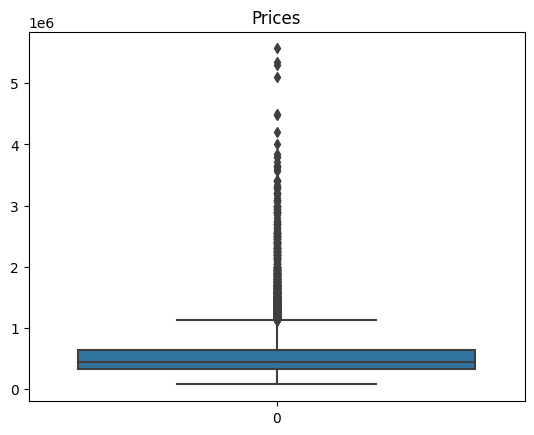

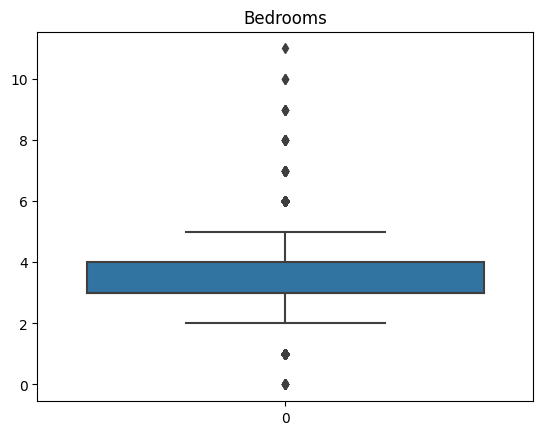

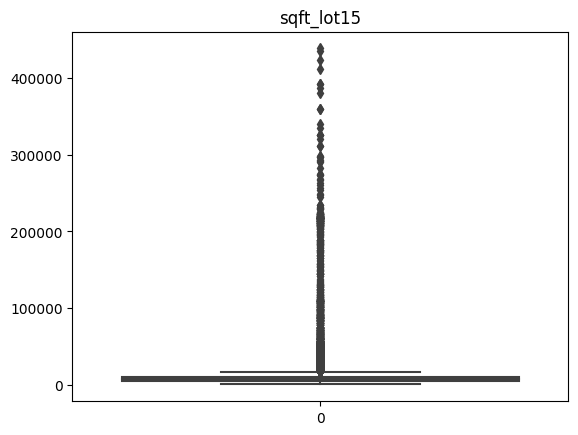

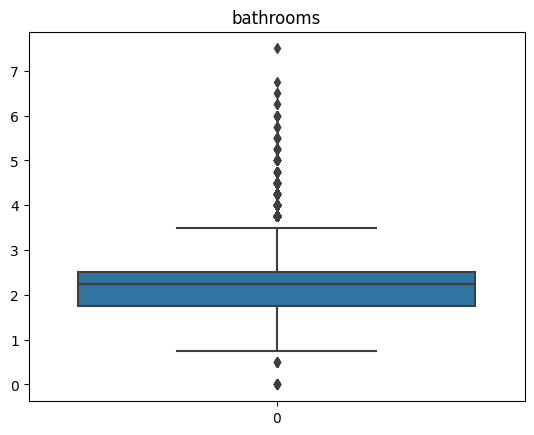

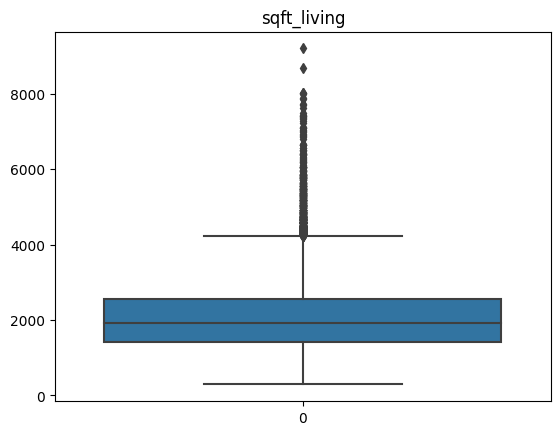

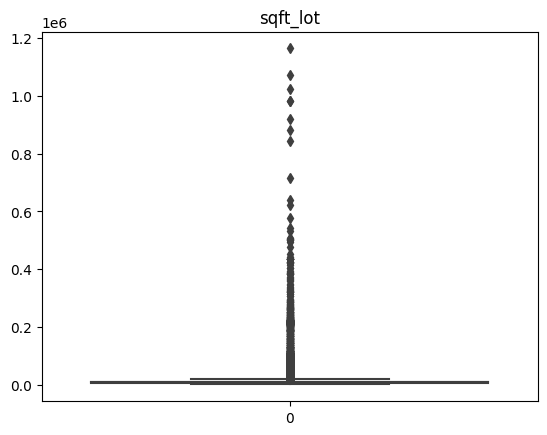

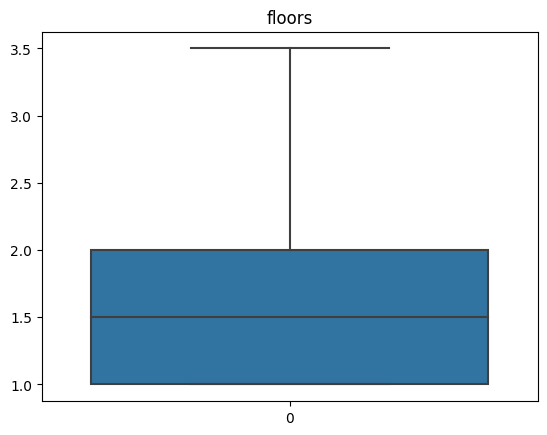

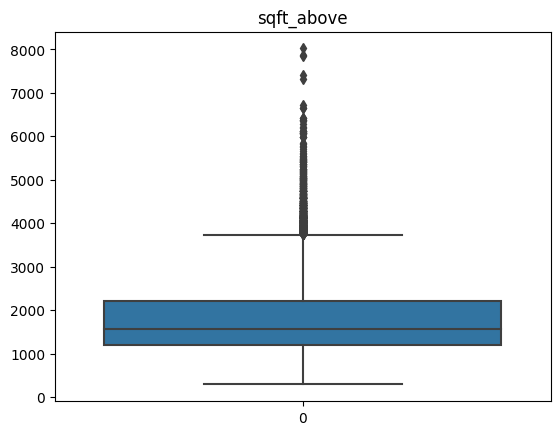

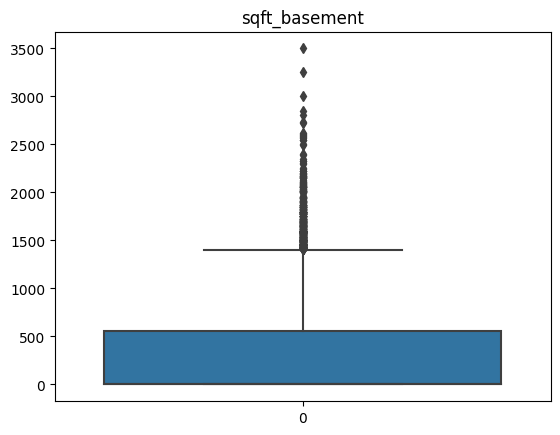

In [161]:
# check for outliers 

# CELL OUTPUT COLLAPSED - MANY PLOTS

# check all numerical columns for outliers
# remove outliers because regression is sensitive to them

# boxplot price 
sns.boxplot(data['price'])
# few entries seem to be outliers, drop them since regression sensitive to outliers
# would pull the line in one direction a lot
# drop all records with prices > 6mil
plt.title('Prices')
plt.show()
data = data[data['price'] <= 6e6]

# check bedrooms
sns.boxplot(data['bedrooms'])
plt.title('Bedrooms')
plt.show()
# drop entry that has 33 bedrooms
data = data[data['bedrooms'] < 30]

sns.boxplot(data['sqft_lot15'])
plt.title('sqft_lot15')
plt.show()
# drop entries exceeding 5e5
data = data[data['sqft_lot15'] < 5e5]

sns.boxplot(data['bathrooms'])
plt.title('bathrooms')
plt.show()
# looks good, no need for action

sns.boxplot(data['sqft_living'])
plt.title('sqft_living')
plt.show()
# drop one outlier exceeding 12,000
data = data[data['sqft_living'] < 12000]

sns.boxplot(data['sqft_lot'])
plt.title('sqft_lot')
plt.show()
# drop one outlier, exceeding 1.5e6
data = data[data['sqft_lot'] < 1.5e6]

sns.boxplot(data['floors'])
plt.title('floors')
plt.show()
# looks good, no need for action

# view, condition, grade are all bounded

sns.boxplot(data['sqft_above'])
plt.title('sqft_above')
plt.show()
# looks good, no need for action

sns.boxplot(data['sqft_basement'])
plt.title('sqft_basement')
plt.show()
# drop one outlier exceeding 4000
data = data[data['sqft_basement'] < 4000]

# won't check long and lat, they are coordinates

In [151]:
out = data[data['sqft_lot15'] > 4e5]
out

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,sale_year,sale_month,sale_day
1719,1020069017,2015-03-27,700000.0,4,1.00,1300,1651359,1.0,0,3,4,6,1300,0,1920,0,98022,47.2313,-122.023,2560,425581,0,2015,3,27
3801,1550000463,2014-08-26,637000.0,4,3.50,3080,118918,2.0,0,0,3,9,3080,0,2008,0,98019,47.7721,-121.924,1830,434728,0,2014,8,26
6691,2624089007,2015-03-20,1998000.0,2,2.50,3900,920423,2.0,0,0,3,12,3900,0,2009,0,98065,47.5371,-121.756,2720,411962,0,2015,3,20
8664,3226079059,2014-10-19,549950.0,3,1.75,2930,266587,2.0,0,0,3,8,2440,490,1995,0,98014,47.6991,-121.947,2700,438213,0,2014,10,19
19156,1020069042,2014-10-01,858000.0,4,3.50,4370,422967,1.0,0,2,4,10,2580,1790,1978,0,98022,47.2332,-122.029,3260,422967,0,2014,10,1


In [152]:
# start of part 2 

# grab the target
target = ['price']

# grab inputs (start with the entire dataset, split between cateogorical and numerical)
# wont pass ID, it is irrelevant for model
# long/lat would be numerical, they are decimals and ratios of them are meaningful
catFeatures = ['sale_year', 'sale_month', 'sale_day', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode']
numFeatures = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']